Enter the number of data points:  5



Enter X values:


X[1]:  1
X[2]:  2
X[3]:  3
X[4]:  4
X[5]:  5



Enter Y values:


Y[1]:  5
Y[2]:  1
Y[3]:  2
Y[4]:  3
Y[5]:  4



Correlation coefficient: 0.00


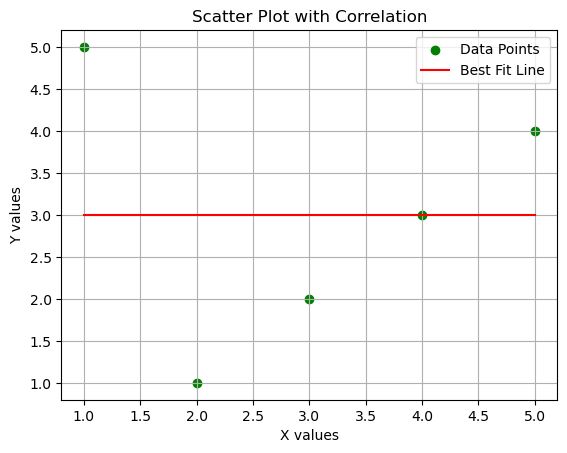

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Enter the number of data points: "))

x = []
print("\nEnter X values:")
for i in range(n):
    val = float(input(f"X[{i+1}]: "))
    x.append(val)

y = []
print("\nEnter Y values:")
for i in range(n):
    val = float(input(f"Y[{i+1}]: "))
    y.append(val)

x = np.array(x)
y = np.array(y)

correlation = np.corrcoef(x, y)[0, 1]
print(f"\nCorrelation coefficient: {correlation:.2f}")

plt.scatter(x, y, color='green', label='Data Points')
plt.title('Scatter Plot with Correlation')
plt.xlabel('X values')
plt.ylabel('Y values')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

Enter number of data points:  10



Enter X values:


X[1]:  12
X[2]:  12
X[3]:  1
X[4]:  11
X[5]:  43
X[6]:  23
X[7]:  21
X[8]:  12
X[9]:  1
X[10]:  12



Enter Y values (0 or 1):


Y[1]:  1
Y[2]:  1
Y[3]:  1
Y[4]:  1
Y[5]:  0
Y[6]:  0
Y[7]:  0
Y[8]:  00
Y[9]:  0
Y[10]:  00


Epoch 0: Loss = 0.6931
Epoch 200: Loss = 0.6291
Epoch 400: Loss = 0.8561
Epoch 600: Loss = 0.5908
Epoch 800: Loss = 1.6611

Final weights: w = -0.1411, b = 1.8944


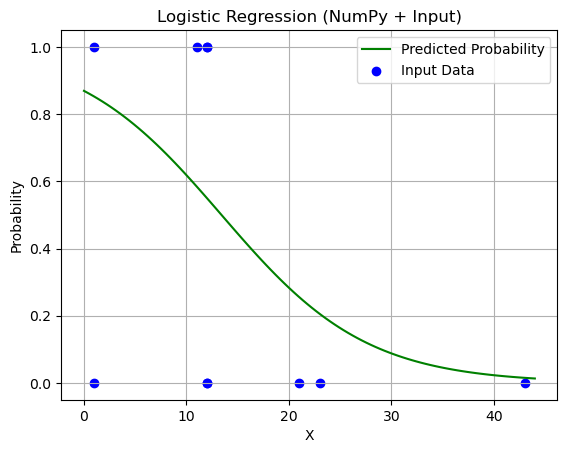

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

def logistic_regression(x, y, lr=0.1, epochs=1000):
    m = len(x)
    w = 0.0
    b = 0.0
    for i in range(epochs):
        z = w * x + b
        y_pred = sigmoid(z)
        dw = np.dot((y_pred - y), x) / m
        db = np.sum(y_pred - y) / m
        w -= lr * dw
        b -= lr * db
        if i % 200 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {i}: Loss = {loss:.4f}")
    return w, b

n = int(input("Enter number of data points: "))

x = []
y = []
print("\nEnter X values:")
for i in range(n):
    x.append(float(input(f"X[{i+1}]: ")))

print("\nEnter Y values (0 or 1):")
for i in range(n):
    y.append(int(input(f"Y[{i+1}]: ")))

x = np.array(x)
y = np.array(y)

w, b = logistic_regression(x, y)

x_test = np.linspace(min(x)-1, max(x)+1, 100)
y_pred = sigmoid(w * x_test + b)

print(f"\nFinal weights: w = {w:.4f}, b = {b:.4f}")

plt.plot(x_test, y_pred, color='green', label='Predicted Probability')
plt.scatter(x, y, color='blue', label='Input Data')
plt.title("Logistic Regression (NumPy + Input)")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()